## <font color=blue> MODELO DE REGRESIÓN LINEAL - APRENDIZAJE SUPERVISADO</font>


---

## <font color=red>REQUISITOS:</font>

> El objetivo de este cuaderno es predecir el valor de la tempertura según el ICA (Índice de la Calidad del Aire).
>
> Los valores de predición, están basados en datos históricos (2015-2023).
> 
> El ICA utilizado para predecir la temperatura, es un valor calculado, y su índice se basa en el valor general, lo cuál ha sido tratado en procesos anteriores.
> 0
> La aplicación del Aprendizaje Supervisado en este cuaderno, hace uso del Modelo de Regresión Lineal.
>
> En este cuaderno se entiende que el preprocesamiento de valores nulos, outiliers, creación y tratamiento de columnas ya han sido tratados en etapas anteriores al proceso de Aprendizaje Supervisado.
> 
> Los datos usados para el desarrollo del modelo de regresión lineal se han obtenido del fichero CSV "calidad_aire_clean_outliers.csv". 
>
---

## <font color=pink>Importar Librerías</font>

In [135]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 110


## <font color=pink>Cargar Datos</font>

In [136]:
# Definir la ruta de almacenamiento de ficheros
ruta = '../data/calidad_aire_clean_outliers.csv'


In [137]:
# Cargar los datos del CSV en el DataFrame
df = pd.read_csv(ruta, delimiter=",", engine="python")
df.head(5)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,19.0,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,16.0,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64
2,2019-01-01 07:00:00,2019.0,1.0,1.0,7,Martes,8.0,10.0,0.4,56.0,...,18.0,9.32,2.5,4.0,51.0,8.0,36.0,7.77,140.0,47.94
3,2019-01-01 08:00:00,2019.0,1.0,1.0,8,Martes,8.0,11.0,0.4,58.0,...,15.0,8.78,2.4,3.9,52.0,8.8,30.0,7.32,145.0,47.78
4,2019-01-01 09:00:00,2019.0,1.0,1.0,9,Martes,8.0,12.0,0.4,51.0,...,16.0,17.29,2.9,4.3,49.0,9.6,32.0,14.41,127.5,45.88


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30860 entries, 0 to 30859
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FECHA        30860 non-null  object 
 1   ANO          30860 non-null  float64
 2   MES          30860 non-null  float64
 3   DIA          30860 non-null  float64
 4   HORA         30860 non-null  int64  
 5   DIA_SEMANA   30860 non-null  object 
 6   ESTACION     30860 non-null  float64
 7   SO2          30860 non-null  float64
 8   CO           30860 non-null  float64
 9   NO2          30860 non-null  float64
 10  PM2.5        30860 non-null  float64
 11  PM10         30860 non-null  float64
 12  O3           30860 non-null  float64
 13  BTX          30860 non-null  float64
 14  TEMPERATURA  30860 non-null  float64
 15  HUMEDAD      30860 non-null  float64
 16  ICA_SO2      30860 non-null  float64
 17  ICA_PM10     30860 non-null  float64
 18  ICA_O3       30860 non-null  float64
 19  ICA_

## <font color=pink>Preparar los datos para la Regresión Lineal</font>

In [139]:
df.columns

Index(['FECHA', 'ANO', 'MES', 'DIA', 'HORA', 'DIA_SEMANA', 'ESTACION', 'SO2',
       'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD',
       'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA'],
      dtype='object')

In [140]:
# Convertir los tipos de columnas
df_tipo_datos = pd.DataFrame(df)

# converte a valor categórico 
df["DIA_SEMANA"] = df_tipo_datos["DIA_SEMANA"].astype("category")

columnas_numericas_integer = ['ANO', 'MES', 'DIA', 'HORA', 'ESTACION']

columnas_numericas_float = ['SO2', 'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD', 'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA']

# converte a valores numericos tipo float los valores de la lista
for i in columnas_numericas_float:
    df[i] = df[i].astype("float64")
    
# converte a valores numericos tipo integer (entero) los valores de la lista
for i in columnas_numericas_integer:
    df[i] = df[i].astype("int64")

#### Convertir FECHA al formato datetime y dejarla como índice
    
# Pasa la columna "FECHA" ao formato datetime
df['FECHA_HORA'] = pd.to_datetime(
    df['FECHA'],
    format='%Y.%m.%d %H:%M:%S'
)

# Fija esta nueva columna como índice del DataFrame
df = df.set_index('FECHA_HORA')

# Ordena el DataFrame de forma ascendente según "datetime"
df.sort_index(inplace=True)

# Elimina la columna "FECHA" original
df = df.drop(columns=['FECHA'])
df.head(2)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30860 entries, 2019-01-01 05:00:00 to 2023-05-31 23:00:00
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ANO          30860 non-null  int64   
 1   MES          30860 non-null  int64   
 2   DIA          30860 non-null  int64   
 3   HORA         30860 non-null  int64   
 4   DIA_SEMANA   30860 non-null  category
 5   ESTACION     30860 non-null  int64   
 6   SO2          30860 non-null  float64 
 7   CO           30860 non-null  float64 
 8   NO2          30860 non-null  float64 
 9   PM2.5        30860 non-null  float64 
 10  PM10         30860 non-null  float64 
 11  O3           30860 non-null  float64 
 12  BTX          30860 non-null  float64 
 13  TEMPERATURA  30860 non-null  float64 
 14  HUMEDAD      30860 non-null  float64 
 15  ICA_SO2      30860 non-null  float64 
 16  ICA_PM10     30860 non-null  float64 
 17  ICA_O3       30860 non-null  float

In [141]:
# ahora tenemos la fecha convertida y como índice del DataFrame
df.head()

,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,PM2.5,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
FECHA_HORA,,,,,,,,,,,,,,,,,,,,
2019-01-01 05:00:00,2019,1,1,5,Martes,8,10.0,0.4,50.0,14.0,19.0,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22
2019-01-01 06:00:00,2019,1,1,6,Martes,8,8.0,0.4,55.0,12.0,16.0,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64
2019-01-01 07:00:00,2019,1,1,7,Martes,8,10.0,0.4,56.0,14.0,18.0,9.32,2.5,4.0,51.0,8.0,36.0,7.77,140.0,47.94
2019-01-01 08:00:00,2019,1,1,8,Martes,8,11.0,0.4,58.0,12.0,15.0,8.78,2.4,3.9,52.0,8.8,30.0,7.32,145.0,47.78
2019-01-01 09:00:00,2019,1,1,9,Martes,8,12.0,0.4,51.0,11.0,16.0,17.29,2.9,4.3,49.0,9.6,32.0,14.41,127.5,45.88


In [142]:

# Selecciona las columnas(variables) que queremos predecir con la Regresión Lineal
variables_elegidas = ['ICA', 'TEMPERATURA']
df_variables_elegidas = pd.read_csv(ruta, usecols=variables_elegidas)

columna_ica = df_variables_elegidas.pop('ICA')
df_variables_elegidas.insert(0, 'ICA', columna_ica)

df_variables_elegidas


,ICA,TEMPERATURA
0,45.22,4.7
1,45.64,3.2
2,47.94,4.0
3,47.78,3.9
4,45.88,4.3
...,...,...
30855,44.45,24.2
30856,39.99,22.5
30857,38.44,21.4
30858,32.65,20.4


In [143]:
df_variables_elegidas.shape

(30860, 2)

In [144]:
df_variables_elegidas.describe().round(2)

,ICA,TEMPERATURA
count,30860.00,30860.00
mean,39.31,16.42
std,11.94,7.96
min,12.94,-2.90
25%,30.55,10.20
50%,37.99,15.50
75%,46.26,22.20
max,96.86,40.00


## <font color=pink>Análisis Exploratorio</font>

### <font color=green>**Variables del Dataframe:**</font>

| Contaminante                                                  | Descripción                                              |
| --------------------------------------------------------------| -------------------------------------------------------- |
| SO2 (dióxido de azufre)                                       |                                                          |
| CO2                                                           |    
| NO2 (Dióxido de nitrógeno)                                    | _Es un contaminante atmosférico que se produce fundamentalmente en las combustiones de los vehículos de motor._|
| PM2.5 (Partículas en suspensión tamaño inferior a 2,5 micras) | _Proceden fundamentalmente de la actividad humana, pueden penetrar hasta las partes más profundas del pulmón y pasar a la sangre, y por ello resultan especialmente nocivas._
| PM10 (Partículas en suspensión tamaño inferior a 10 micras)   | _Al ser más grandes quedan en buena parte retenidas en las porciones superiores del aparato respiratorio, como las fosas nasales o los grandes bronquios. Resultan menos perjudiciales para la salud que las PM2,5, pero no son inocuas y se ha observado un aumento de la demanda de atención urgente por crisis asmáticas cuando aumenta su concentración en el aire._                                                                      |
| O3 (Ozono troposférico)                                       | _Es un gas incoloro que puede resultar beneficioso o nocivo para la salud, dependiendo de si se encuentra en las capas más altas de la atmósfera o a nivel del suelo._ 
| BTX                                                           |
| TEMPERATURA                                                   |
| HUMEDAD                                                       |
| ICA_SO2                                                       | _(Concentración_SO2 / Valor_Límite_SO2) * 100_
| ICA_PM10                                                      | _(Concentración_PM10 / Valor_Límite_PM10) * 100_
| ICA_O3                                                        | _(Concentración_O3 / Valor_Límite_O3) * 100_
| ICA_NO2                                                       | _(Concentración_NO2 / Valor_Límite_NO2) * 100_
| ICA                                                           | _(ICA_SO2 + ICA_NO2 + ICA_PM10 + ICA_O3) / 4_ 

## <font color=pink>Modelado</font>

### <font color=green>**--> Dividir los datos en variables de entrada (X) y variable de salida (y)** </font>

In [145]:
# X = df_variables_elegidas[['ICA']]
# y = df_variables_elegidas['TEMPERATURA']
# print('The type of X is ', type(X))
# print('The type of y is ', type(y))

In [146]:
# Dado un determinado indice de ICA, identificar si la temperatura baja o sube
X = df_variables_elegidas.iloc[:, :-1] # selecciona todas las filas pero solamente la primera columna
X[:10]

,ICA
0,45.22
1,45.64
2,47.94
3,47.78
4,45.88
5,40.45
6,41.03
7,43.52
8,55.90
9,56.07


In [147]:
y = df_variables_elegidas.iloc[:, -1]
y[:10]

0     4.7
1     3.2
2     4.0
3     3.9
4     4.3
5     5.9
6     8.4
7    11.5
8    13.2
9    15.1
Name: TEMPERATURA, dtype: float64

### <font color=green>**--> Dividir los datos en conjuntos de entrenamiento y prueba** </font>

El argumento test_size indica la proporción de datos que se utilizarán para el conjunto de prueba. 
Se puede ajustar este valor según las necesidades que haya en el proyecto.
- 80% Entrenamiento: X_train, y_train
- 20% Test: X_test, y_test

In [148]:
# Separa los datos para el entrenamineto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Entrenammiento {X_train.shape} {y_train.shape}')
print(f'Test {X_test.shape} {y_test.shape}')


Entrenammiento (24688, 1) (24688,)
Test (6172, 1) (6172,)


In [149]:
# Verificar se todo esta bien
X_train[:10]

,ICA
20779,56.74
17604,26.15
7886,29.70
22065,19.49
8362,36.34
1009,60.28
19957,35.88
23523,27.26
4306,30.48
15837,38.90


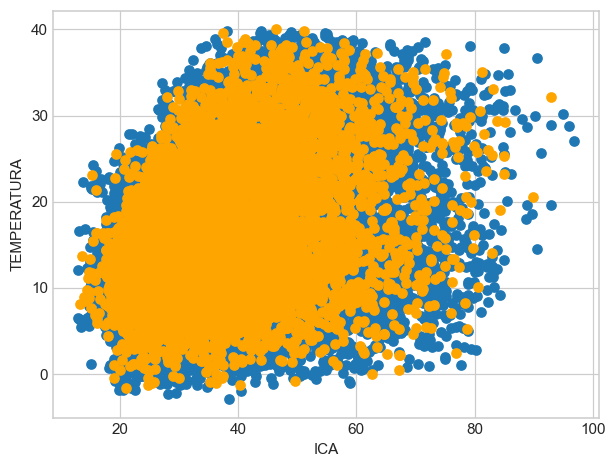

In [150]:
# Generar una gráfica para entender mejor en que consiste este particionamiento
plt.scatter(X_train, y_train) # datos de entrenamiento
plt.scatter(X_test, y_test, c='orange') # datos de test
plt.xlabel('ICA')
plt.ylabel('TEMPERATURA')
plt.show()

## <font color=pink>Regresión Lineal</font>

### <font color=green>--> **Crear una instancia del modelo de regresión lineal** </font>


In [151]:
regression_model = LinearRegression()


### <font color=green>--> **Ajustar el modelo utilizando los datos de entrenamiento** </font>

In [152]:
regression_model.fit(X_train, y_train)

LinearRegression()

### <font color=green>**--> Realizar predicciones utilizando los datos de prueba** </font>


In [153]:
# Haciendo la predicción. 
# Creamos la variable y_pred para poder comparala con el y_test
y_pred = regression_model.predict(X_test) # conjunto de validación, predice sobre datos que no conoce. 
                                          # se hace la predicción con base en los datos de test (datos de validación que hemos 
                                          # creado)
y_pred


array([15.97569936, 14.21401297, 17.66220422, ..., 12.64332833,
       13.71822119, 18.40792383])

Text(0, 0.5, 'Temperatura')

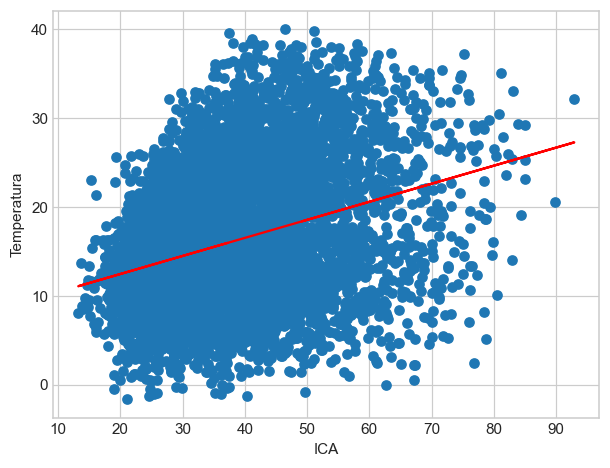

In [154]:
# Valores de test
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r') # Hacemos las predicciones con un plot y usamos la variable y_pred

plt.xlabel('ICA')
plt.ylabel('Temperatura')

A partir de ahí, el modelo ya esta preparado para hacer predicciones.

In [155]:
# Ponemos el nombre de la columna y pasamos la predicción informando el ICA.
X_new = pd.DataFrame({'ICA': [20]}) 

# Ahora pasamos la variable al modelo predict. 
regression_model.predict(X_new) 

array([12.47467785])

Observación:

Al predecir un valor del ICA nos dará cual sería la temperatura.
Se nota que cuanto mayor es el ICA menor es el valor de la temperatura.


## <font color=pink>Evaluar el rendimiento del modelo de regresión lineal</font>


#### <font color=green>**--> Métrica utilizada: Error cuadrático promedio (MSE) y cálculo del coeficiente de determinación (R²)** </font>

El MSE mide el error cuadrático promedio, por lo que cuanto menor sea el valor de MSE, mejor será el ajuste del modelo a los datos. Por otro lado, el R² mide la proporción de varianza explicada, y un valor más cercano a 1 indica un mejor ajuste del modelo a los datos.

**Cálculo del Error Cuadrático Medio (MSE):**
- El Error Cuadrático Medio es una métrica comúnmente utilizada en problemas de regresión y nos permite medir la discrepancia entre los valores reales y los valores predichos por el modelo.
- El cálculo del MSE se realiza sumando los cuadrados de las diferencias entre los valores reales y los valores predichos para cada punto de datos, y luego dividiendo esta suma por el número total de puntos de datos. 
- La fórmula del MSE es la siguiente:
MSE = (1 / M) * Σᵢ(realᵢ - estimadoᵢ)²
  - Donde M es el número total de puntos de datos, 
  - realᵢ es el valor real correspondiente al punto de datos i, y 
  - estimadoᵢ es el valor predicho por el modelo para el punto de datos i.

**Cálculo del Coeficiente de Determinación (R²):**
- El coeficiente de determinación, también conocido como R², es otra métrica comúnmente utilizada en regresión que indica la proporción de la varianza de los valores de respuesta que es explicada por el modelo.
- El cálculo de R² se realiza mediante la comparación de la varianza de los residuos (diferencias entre los valores reales y los valores predichos) con la varianza total de los valores de respuesta. 
- R² puede tomar valores entre 0 y 1, donde 0 indica que el modelo no explica la variabilidad de los datos y 1 indica que el modelo explica perfectamente la variabilidad de los datos.
- La fórmula para calcular R² es la siguiente:
- R² = 1 - (Σᵢ(realᵢ - estimadoᵢ)² / Σᵢ(realᵢ - media_real)²)
  - Donde realᵢ es el valor real correspondiente al punto de datos i, 
  - estimadoᵢ es el valor predicho por el modelo para el punto de datos i, y 
  - media_real es la media de todos los valores reales.

In [156]:
# Donde valores_reales son los valores reales de los datos y valores_predichos son los valores predichos por nuestro modelo.

valores_reales = y_test  # Valores reales de los datos
valores_predichos = y_pred  # Valores predichos por el modelo

mse = mean_squared_error(valores_reales, valores_predichos)
r2 = r2_score(valores_reales, valores_predichos)

print(f'MSE {mse}')
print(f'R2 {r2}')


MSE 57.644075430884165
R2 0.09670367673050417
